In [1]:
import pandas as pd
import statsmodels.api as sm 
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split


In [2]:
# Load the data
df = pd.read_csv("merged.csv", index_col=0)[:100]
X_cols = pd.read_csv("control.csv", index_col=0).columns

betas = {}

for y_col in pd.read_csv("growth.csv", index_col=0).columns:
    y_cols = [y_col]
    X_raw, y_raw = df[X_cols], df[y_cols]

    # 회귀분석을 하기 위한 B_0, 상수항 추가
    x_data1 = sm.add_constant(X_raw, has_constant = "add")

    # 회귀모델 적합
    multi_model = sm.OLS(y_raw, x_data1)
    fitted_multi_model = multi_model.fit()

    # summary함수를 통해 OLS 결과 출력
    fitted_multi_model.summary()
    pred4 = fitted_multi_model.predict(x_data1)

    # residual plot 구하기
    # fitted_multi_model.resid.plot()
    # plt.xlabel("residual_number")
    # plt.show()
    betas[y_col] = fitted_multi_model.params
y_cols = ["FRT_LNGTH"] # "FWRCT_HGHT"]
X_raw, y_raw = df[X_cols], df[y_cols]


/home/agtech-research/문서/tomato2023/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/home/agtech-research/문서/tomato2023/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/home/agtech-research/문서/tomato2023/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/home/agtech-research/문서/tomato2023/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/home/agtech-research/문서/tomato2023/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar di

In [3]:
x_data1 = sm.add_constant(X_raw, has_constant = "add")

# 회귀모델 적합
multi_model = sm.OLS(y_raw, x_data1)
fitted_multi_model = multi_model.fit()

# summary함수를 통해 OLS 결과 출력
fitted_multi_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FRT_LNGTH   R-squared:                -5687760.220
Model:                            OLS   Adj. R-squared:           -7930820.983
Method:                 Least Squares   F-statistic:                    -2.536
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               1.00
Time:                        17:10:17   Log-Likelihood:                 2268.9
No. Observations:                 100   AIC:                            -4480.
Df Residuals:                      71   BIC:                            -4404.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     5.474e-05   2.82e-15   1.94e+10      0.000    5.47e-05    5.47e-05
EXTN_TPRT                -1.066e-14   1.89e-11     -0.001      1.000   -3.77e-11    3.76e-11
DWP_TPRT                 -7.105e-14   1.75e-10     -0.000      1.000   -3.48e-10    3.48e-10
WNDRC                     4.337e-17   6.65e-14      0.001      0.999   -1.32e-13    1.33e-13
ABSLT_HMDT               -2.842e-14   3.03e-10  -9.38e-05      1.000   -6.04e-10    6.04e-10
WDSP                     -2.887e-15    1.1e-11     -0.000      1.000   -2.19e-11    2.19e-11
STRTN_WATER              -9.948e-14   3.12e-10     -0.000      1.000   -6.21e-10    6.21e-10
EXTN_SRQT                -1.243e-14   1.01e-11     -0.001      0.999   -2.01e-11    2.01e-11
WATER_LACK_VL            -2.274e-13   2.93e-10     -0.001      0.999   -5.84e-10    5.83e-10
EXTN_ACCMLT_QOFLG            0.0521   2.68e-12   1.94e+10      0.000       0.052       0.052
SPL_TPRT_1               -2.842e-14   3.22e-11     -0.001      0.999   -6.42e-11    6.41e-11
SPL_TPRT_2                5.329e-15    3.1e-11      0.000      1.000   -6.18e-11    6.19e-11
HTNG_TPRT_1              -4.619e-14   5.94e-11     -0.001      0.999   -1.18e-10    1.18e-10
VNTILAT_TPRT_5           -3.459e-20   3.56e-24  -9726.067      0.000   -3.46e-20   -3.46e-20
VNTILAT_TPRT_4           -1.316e-19   1.21e-24  -1.09e+05      0.000   -1.32e-19   -1.32e-19
VNTILAT_TPRT_3             1.99e-13   2.64e-10      0.001      0.999   -5.27e-10    5.27e-10
VNTILAT_TPRT_2            1.137e-13   1.19e-10      0.001      0.999   -2.37e-10    2.37e-10
VNTILAT_TPRT_1           -1.492e-13   1.54e-10     -0.001      0.999   -3.06e-10    3.06e-10
TRWVLV_OPDR_RATE_2        1.082e-15   1.18e-12      0.001      0.999   -2.35e-12    2.35e-12
TRWVLV_OPDR_RATE_1           0.0014   7.04e-14   1.94e+10      0.000       0.001       0.001
HRZNT_SCRN_OPDR_RATE_2   -1.243e-14   1.47e-11     -0.001      0.999   -2.92e-11    2.92e-11
SKLT_OPDR_RATE_1_LEFT     -2.72e-20   2.93e-25   -9.3e+04      0.000   -2.72e-20   -2.72e-20
HRZNT_SCRN_OPDR_RATE_1    4.174e-20   8.67e-25   4.81e+04      0.000    4.17e-20    4.17e-20
SKLT_OPDR_RATE_1_RIGHT   -1.638e-20   6.73e-25  -2.43e+04      0.000   -1.64e-20   -1.64e-20
INNER_TPRT_1                      0   7.54e-10          0      1.000    -1.5e-09     1.5e-09
INNER_TPRT_2              -1.99e-13   7.41e-10     -0.000      1.000   -1.48e-09    1.48e-09
AVE_INNER_TPRT_1_2        2.274e-13   1.46e-09      0.000      1.000    -2.9e-09    2.91e-09
AVE_INNER_HMDT_1_2       -6.821e-13   1.31e-09     -0.001      1.000    -2.6e-09     2.6e-09
INNER_HMDT_1              1.137e-13   6.49e-10      0.000      1.000   -1.29e-09    1.29e-09
INNER_HMDT_2              2.274e-13   6.53e-10      0.000      1.000    -1.3e-09     1.3e-09
CBDX_STNG_VL  

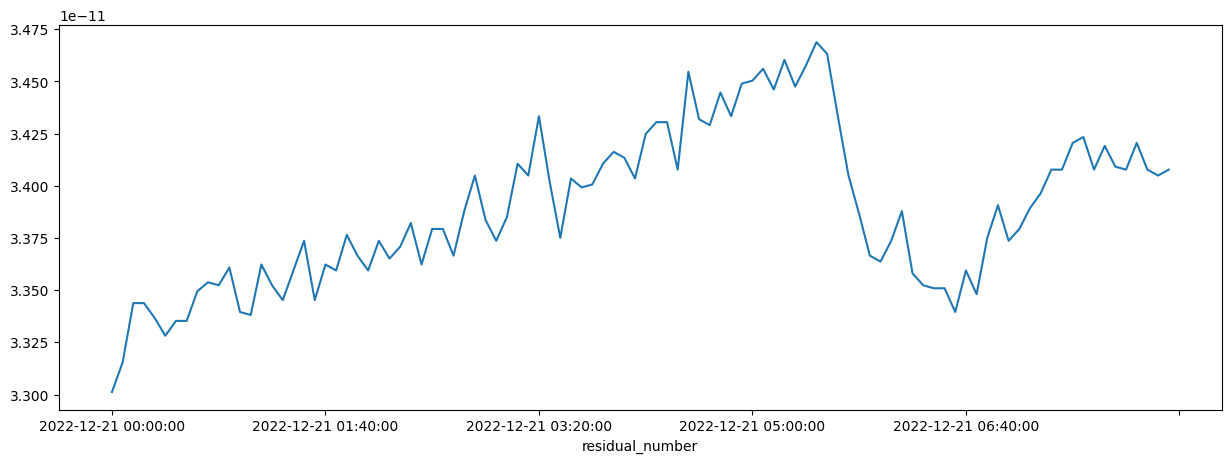

const                       5.473923e-05
EXTN_TPRT                  -1.065814e-14
DWP_TPRT                   -7.105427e-14
WNDRC                       4.336809e-17
ABSLT_HMDT                 -2.842171e-14
WDSP                       -2.886580e-15
STRTN_WATER                -9.947598e-14
EXTN_SRQT                  -1.243450e-14
WATER_LACK_VL              -2.273737e-13
EXTN_ACCMLT_QOFLG           5.211175e-02
SPL_TPRT_1                 -2.842171e-14
SPL_TPRT_2                  5.329071e-15
HTNG_TPRT_1                -4.618528e-14
VNTILAT_TPRT_5             -3.458662e-20
VNTILAT_TPRT_4             -1.315831e-19
VNTILAT_TPRT_3              1.989520e-13
VNTILAT_TPRT_2              1.136868e-13
VNTILAT_TPRT_1             -1.492140e-13
TRWVLV_OPDR_RATE_2          1.082467e-15
TRWVLV_OPDR_RATE_1          1.368481e-03
HRZNT_SCRN_OPDR_RATE_2     -1.243450e-14
SKLT_OPDR_RATE_1_LEFT      -2.719836e-20
HRZNT_SCRN_OPDR_RATE_1      4.173933e-20
SKLT_OPDR_RATE_1_RIGHT     -1.637819e-20
INNER_TPRT_1    

In [6]:
import matplotlib.pyplot as plt
pred4 = fitted_multi_model.predict(x_data1)

# residual plot 구하기
plt.figure(figsize=(15, 5)) 
fitted_multi_model.resid.plot()
plt.xlabel("residual_number")
plt.show()
print(fitted_multi_model.params)